<a href="https://colab.research.google.com/github/Malu2810/-Improving-vessel-performance-using-deep-learning/blob/main/sih_peak_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
df=pd.read_csv("/content/download-csv-1.csv")

In [ ]:
df.head()

,index,time,longitude,latitude,stationID,significant_wave_height,mean_wave_period,mean_wave_direction,wave_power_per_unit_crest_length,peak_period,energy_period
0,0,UTC,degrees_east,degrees_north,NaN,m,s,degrees,kW/m,s,s
1,1,2017-11-25T00:00:00Z,-10.14618,54.23086,Belmullet_Inner,3.79852,7.0341,301.899,76.8657438679395,12.9631,10.3439
2,2,2017-11-25T00:30:00Z,-10.14618,54.23086,Belmullet_Inner,3.8261,7.0528,301.992,78.12442059576415,12.976,10.3614
3,3,2017-11-25T01:00:00Z,-10.14618,54.23086,Belmullet_Inner,3.85141,7.0781,302.033,79.36681752543132,12.9902,10.3878
4,4,2017-11-25T01:30:00Z,-10.14618,54.23086,Belmullet_Inner,3.87685,7.1051,302.021,80.64054254115693,13.0056,10.4169


In [ ]:
df=df.drop(["index","time","latitude","longitude","stationID"],axis=1)

In [ ]:
df.head()

,significant_wave_height,mean_wave_period,mean_wave_direction,wave_power_per_unit_crest_length,peak_period,energy_period
0,m,s,degrees,kW/m,s,s
1,3.79852,7.0341,301.899,76.8657438679395,12.9631,10.3439
2,3.8261,7.0528,301.992,78.12442059576415,12.976,10.3614
3,3.85141,7.0781,302.033,79.36681752543132,12.9902,10.3878
4,3.87685,7.1051,302.021,80.64054254115693,13.0056,10.4169


In [ ]:
df=df.tail(-1)
df.reset_index(drop=True,inplace=True)
df.head()

,significant_wave_height,mean_wave_period,mean_wave_direction,wave_power_per_unit_crest_length,peak_period,energy_period
0,3.79852,7.0341,301.899,76.8657438679395,12.9631,10.3439
1,3.8261,7.0528,301.992,78.12442059576415,12.976,10.3614
2,3.85141,7.0781,302.033,79.36681752543132,12.9902,10.3878
3,3.87685,7.1051,302.021,80.64054254115693,13.0056,10.4169
4,3.90283,7.1335,301.971,81.9538670802012,13.0217,10.447


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   significant_wave_height           3465 non-null   object
 1   mean_wave_period                  3465 non-null   object
 2   mean_wave_direction               3465 non-null   object
 3   wave_power_per_unit_crest_length  3465 non-null   object
 4   peak_period                       3465 non-null   object
 5   energy_period                     3465 non-null   object
dtypes: object(6)
memory usage: 162.5+ KB


In [ ]:
df=df.astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   significant_wave_height           3465 non-null   float64
 1   mean_wave_period                  3465 non-null   float64
 2   mean_wave_direction               3465 non-null   float64
 3   wave_power_per_unit_crest_length  3465 non-null   float64
 4   peak_period                       3465 non-null   float64
 5   energy_period                     3465 non-null   float64
dtypes: float64(6)
memory usage: 162.5 KB


In [ ]:
df1= df.reindex(columns = ['peak_period'])
print(df1)

      peak_period
0         12.9631
1         12.9760
2         12.9902
3         13.0056
4         13.0217
...           ...
3460       4.4115
3461       4.4089
3462       4.4063
3463       4.4035
3464       4.4001

[3465 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
print('Shape of the scaled data matrix: ', df1.shape)

Shape of the scaled data matrix:  (3465, 1)


In [ ]:
df1 =pd.DataFrame(df1)
train = df1[:2000]
test = df1[2000:]
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (2000, 1)
Shape of test data:  (1465, 1)


In [ ]:
def prepare_data(data):
    databatch = 3
    x_list = []
    y_list = []
    data = list(data[0])
    for i in range(len(data)-databatch-1):
        x_list.append(data[i:i+databatch])
        y_list.append(data[i+databatch+1])

    X_data = np.array(x_list)
    X_data = np.expand_dims(X_data,axis=1)
    X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], X_data.shape[2]))
    y_data = np.array(y_list)
    y_data = np.expand_dims(y_data,axis=1)

    return X_data, y_data

In [ ]:
X_train, y_train = prepare_data(train)
X_test, y_test = prepare_data(test)
print('X_train Shape : ', X_train.shape, 'y_train shape :', y_train.shape)
print('X_test Shape  : ', X_test.shape, ' y_test shape  :', y_test.shape)

X_train Shape :  (1996, 1, 3) y_train shape : (1996, 1)
X_test Shape  :  (1461, 1, 3)  y_test shape  : (1461, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
def lstm_model(x_data, y_data, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(100, input_shape=(x_data.shape[1], x_data.shape[2]), return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(25))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(x_data, y_data, validation_split=0.25, epochs=num_epochs, batch_size=batch_size)
    return model, history

In [ ]:
history = lstm_model(X_train, y_train, num_epochs=15, batch_size=100, learning_rate=.001)

Epoch 1/15
15/15 [==============================] - 15s 102ms/step - loss: 0.2999 - val_loss: 0.3944
Epoch 2/15
15/15 [==============================] - 0s 18ms/step - loss: 0.2025 - val_loss: 0.1953
Epoch 3/15
15/15 [==============================] - 0s 21ms/step - loss: 0.0498 - val_loss: 0.0111
Epoch 4/15
15/15 [==============================] - 0s 18ms/step - loss: 0.0167 - val_loss: 0.0131
Epoch 5/15
15/15 [==============================] - 0s 18ms/step - loss: 0.0100 - val_loss: 0.0074
Epoch 6/15
15/15 [==============================] - 0s 21ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 7/15
15/15 [==============================] - 0s 18ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 8/15
15/15 [==============================] - 0s 19ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 9/15
15/15 [==============================] - 0s 18ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 10/15
15/15 [==============================] - 0s 18ms/step - loss: 0.0024 - val_loss: 0.0046
Epoch 1

In [ ]:
print(history)

(<keras.src.engine.sequential.Sequential object at 0x7ec602f7bb50>, <keras.src.callbacks.History object at 0x7ec600264a60>)


In [ ]:
def predicting(data, y_real):
    predicted_data = history[0].predict(data)
    # Invert scaling process to get the normal values range for the features
    predicted_data = scaler.inverse_transform(predicted_data)
    y_real = scaler.inverse_transform(y_real)
    print(y_real)
    return predicted_data, y_real

In [ ]:
train_prediction, y_train = predicting(X_train, y_train)
test_prediction, y_test = predicting(X_test, y_test)

63/63 [==============================] - 1s 3ms/step
[[13.0217]
 [13.0386]
 [13.0565]
 ...
 [14.2058]
 [14.1712]
 [14.1363]]
46/46 [==============================] - 0s 3ms/step
[[13.9565]
 [13.9174]
 [13.8758]
 ...
 [ 4.4063]
 [ 4.4035]
 [ 4.4001]]


In [ ]:
import math
from sklearn.metrics import mean_squared_error
print('Trainin Data Errors')
print(mean_squared_error(y_train[0], train_prediction[0]),'\n')
print('Test Data Errors')
print(mean_squared_error(y_test[0], test_prediction[0]))

Trainin Data Errors
0.0002120389869017048 

Test Data Errors
0.18103236978046608


Predictions are in Red
Observed are in Blue
For the ease of understanding the model, the real and predicted datas are limited by 144 samples which means 72hr(Samples from 1279-1423).


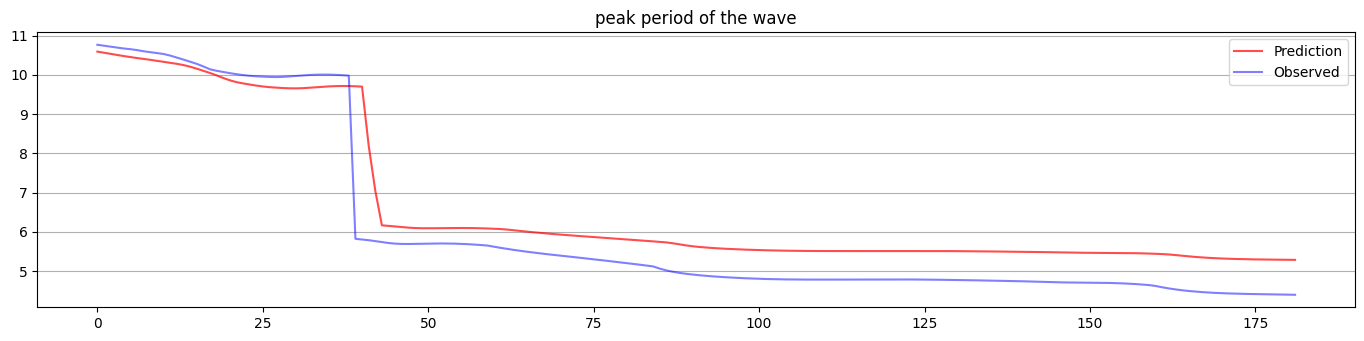

In [ ]:
from matplotlib import pyplot as plt
print("Predictions are in Red")
print("Observed are in Blue")
print("For the ease of understanding the model, the real and predicted datas are limited by 144 samples which means 72hr(Samples from 1279-1423).")
print("================================")
plt.figure(figsize=(17,25))
plt.subplot(6,1,1)
plt.plot(test_prediction[1279:,0], color='red', alpha=0.7, label='Prediction')
plt.title('peak period of the wave')
plt.legend()
plt.plot(y_test[1279:,0], color='blue', alpha=0.5, label='Observed')
plt.legend()
plt.grid(visible=True, axis='y')

In [ ]:
x_input = np.array([0.875,0.763,0.77,0.747])
hs_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(hs_input)>3):
        x_input=np.array(hs_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1,1,3))
        model = history[0].predict(x_input, verbose=0)
        print("{} day output {}".format(i,model))
        hs_input.append(model[0][0])
        hs_input=hs_input[1:]
        lst_output.append(model[0][0])
        i=i+1
    else:
      x_input = x_input.reshape((1,1,3))
      model =history[0].predict(x_input, verbose=0)
      print(model[0])
      hs_input.append(model[0][0])
      lst_output.append(model[0][0])
      i=i+1


print(lst_output)
lst_output=np.array(lst_output)

0 day input [0.763 0.77  0.747]
0 day output [[0.7539859]]
1 day input [0.77       0.747      0.75398588]
1 day output [[0.7505119]]
2 day input [0.747      0.75398588 0.75051188]
2 day output [[0.74384147]]
3 day input [0.7539859  0.7505119  0.74384147]
3 day output [[0.74193466]]
4 day input [0.7505119  0.74384147 0.74193466]
4 day output [[0.73733234]]
5 day input [0.74384147 0.74193466 0.73733234]
5 day output [[0.73231524]]
6 day input [0.74193466 0.73733234 0.73231524]
6 day output [[0.72770286]]
7 day input [0.73733234 0.73231524 0.72770286]
7 day output [[0.72221196]]
8 day input [0.73231524 0.72770286 0.72221196]
8 day output [[0.7163723]]
9 day input [0.72770286 0.72221196 0.7163723 ]
9 day output [[0.71020204]]
[0.7539859, 0.7505119, 0.74384147, 0.74193466, 0.73733234, 0.73231524, 0.72770286, 0.72221196, 0.7163723, 0.71020204]
